In [218]:
# Read the data and output the first 10 rows of the dataset using pandas.
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [219]:
# Check for missing values in the dataset.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [220]:
# We do not need 'Id' and 'Name' for clustering
# The 'Cabin' and 'Ticket' columns contain a lot of missing values.
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# Check for missing values in the dataset.
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [221]:
# Replace missing values in the 'Age' and 'Embarked' columns.
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

most_common_embarked = data['Embarked'].value_counts().index[0]
data['Embarked'].fillna(most_common_embarked, inplace=True)

data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [222]:
# Encode categorical variables.
encoded_data = pd.get_dummies(data, columns=['Pclass', 'Sex', 'Embarked'])

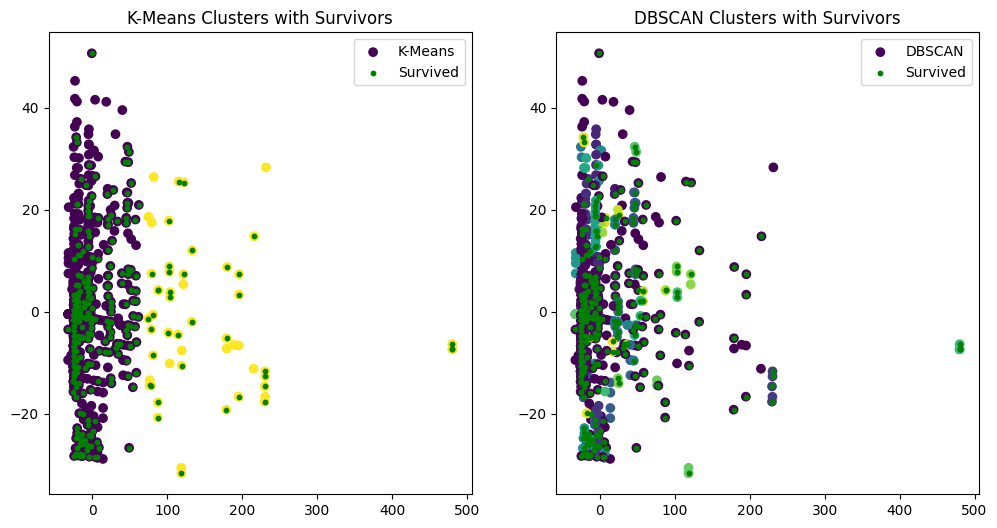

In [223]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=58)
kmeans.fit(encoded_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(encoded_data)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca.fit(encoded_data)
reduced_data = pca.transform(encoded_data)

# Visualize clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, label='K-Means')
ax1.scatter(reduced_data[data['Survived']==1, 0], reduced_data[data['Survived']==1, 1], c='green', label='Survived', s=10)
ax1.set_title('K-Means Clusters with Survivors')
ax1.legend()

ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan.labels_, label='DBSCAN')
ax2.scatter(reduced_data[data['Survived']==1, 0], reduced_data[data['Survived']==1, 1], c='green', label='Survived', s=10)
ax2.set_title('DBSCAN Clusters with Survivors')
ax2.legend()
plt.show()

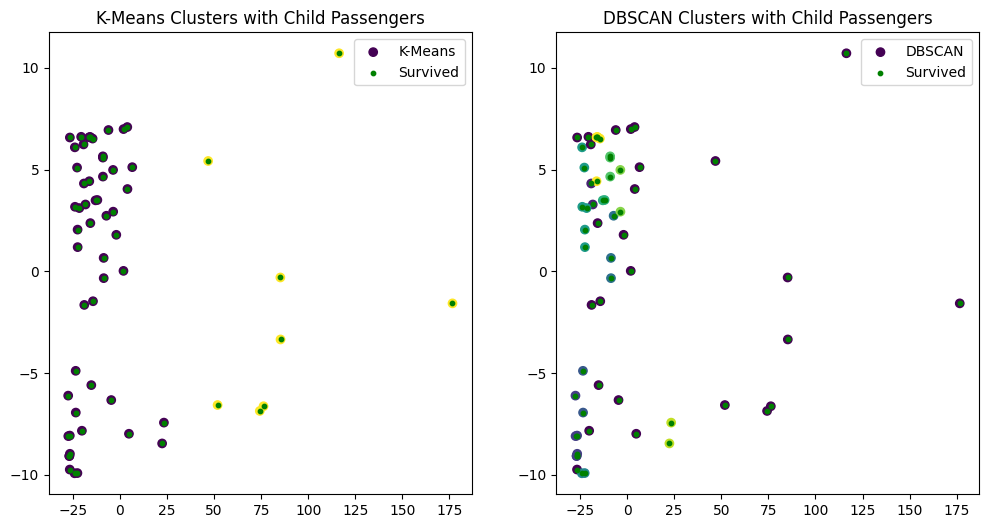

In [224]:
# Clustering only for children
child_mask = (data['Age'] < 18) & (data['Survived'] == 1)
child_data = encoded_data[child_mask]

kmeans = KMeans(n_clusters=2, n_init=10, random_state=58)
kmeans.fit(child_data)

dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(child_data)

pca = PCA(n_components=2)
pca.fit(child_data)
reduced_child_data = pca.transform(child_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(reduced_child_data[:, 0], reduced_child_data[:, 1], c=kmeans.labels_, label='K-Means')
ax1.scatter(reduced_child_data[:, 0], reduced_child_data[:, 1], c='green', label='Survived', s=10)
ax1.set_title('K-Means Clusters with Child Passengers')
ax1.legend()

ax2.scatter(reduced_child_data[:, 0], reduced_child_data[:, 1], c=dbscan.labels_, label='DBSCAN')
ax2.scatter(reduced_child_data[:, 0], reduced_child_data[:, 1], c='green', label='Survived', s=10)
ax2.set_title('DBSCAN Clusters with Child Passengers')
ax2.legend()

plt.legend()
plt.show()

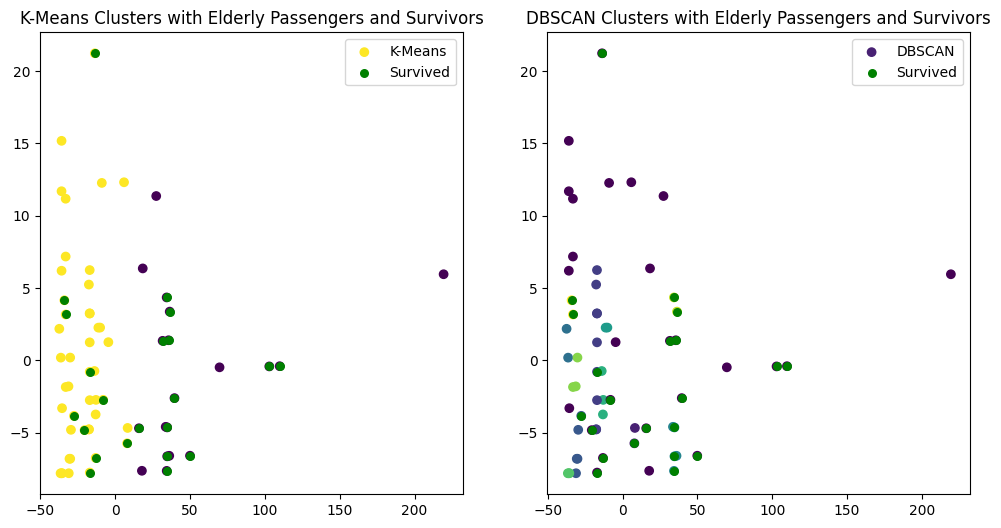

In [225]:
# Data for passengers over 50 years old
elderly_mask = data['Age'] > 50
elderly_data = encoded_data[elderly_mask]

# K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=58)
kmeans.fit(elderly_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(elderly_data)

# Data dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit(elderly_data)
reduced_elderly_data = pca.transform(elderly_data)

# Data for survived passengers over 50 years old
survivor_mask = (data['Age'] > 50) & (data['Survived'] == 1)
survivor_data = encoded_data[survivor_mask]

# Adding green dots for survivors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(reduced_elderly_data[:, 0], reduced_elderly_data[:, 1], c=kmeans.labels_, label='K-Means')
ax1.scatter(pca.transform(survivor_data)[:, 0], pca.transform(survivor_data)[:, 1], c='green', label='Survived', s=30)
ax1.set_title('K-Means Clusters with Elderly Passengers and Survivors')
ax1.legend()

ax2.scatter(reduced_elderly_data[:, 0], reduced_elderly_data[:, 1], c=dbscan.labels_, label='DBSCAN')
ax2.scatter(pca.transform(survivor_data)[:, 0], pca.transform(survivor_data)[:, 1], c='green', label='Survived', s=30)
ax2.set_title('DBSCAN Clusters with Elderly Passengers and Survivors')
ax2.legend()

plt.show()

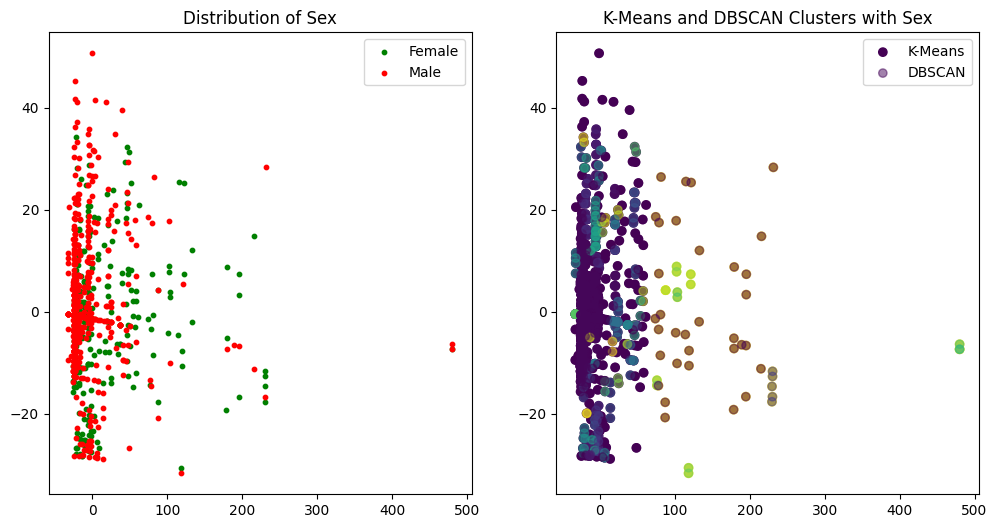

In [226]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=58)
kmeans.fit(encoded_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(encoded_data)

# Data dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit(encoded_data)
reduced_data = pca.transform(encoded_data)

# Visualization of clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(reduced_data[data['Sex']=='female', 0], reduced_data[data['Sex']=='female', 1], c='green', label='Female', s=10)
ax1.scatter(reduced_data[data['Sex']=='male', 0], reduced_data[data['Sex']=='male', 1], c='red', label='Male', s=10)
ax1.set_title('Distribution of Sex')
ax1.legend()

ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, label='K-Means')
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan.labels_, label='DBSCAN', alpha=0.5)
ax2.set_title('K-Means and DBSCAN Clusters with Sex')
ax2.legend()

plt.show()


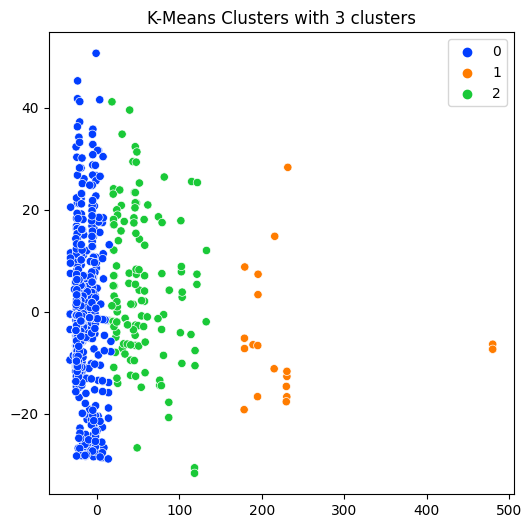

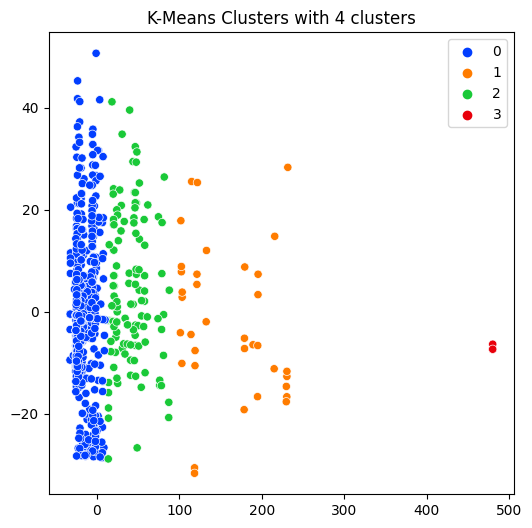

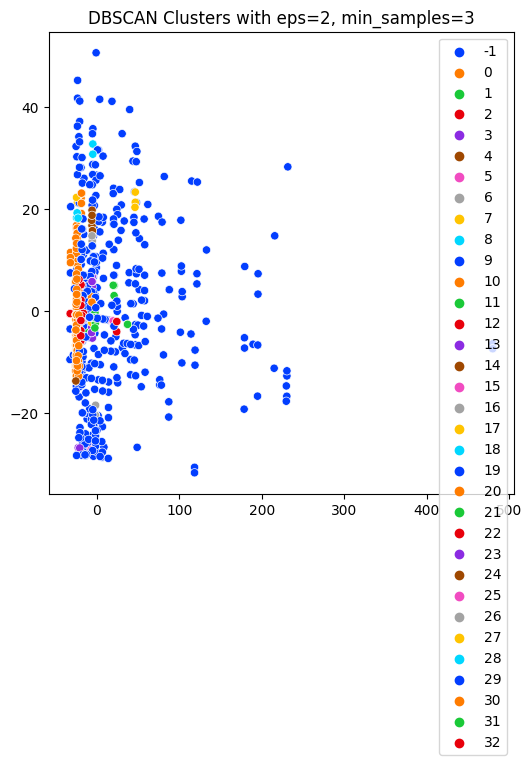

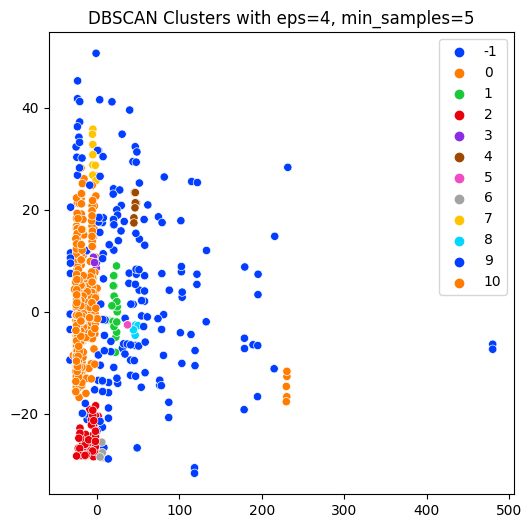

In [227]:
# K-Means clustering with different parameters
kmeans1 = KMeans(n_clusters=3, n_init=10, random_state=58)
kmeans1.fit(encoded_data)
plt.figure(figsize=(6,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans1.labels_,
                palette=sns.color_palette("bright", n_colors=3))
plt.title('K-Means Clusters with 3 clusters')
plt.show()

kmeans2 = KMeans(n_clusters=4, n_init=10, random_state=58)
kmeans2.fit(encoded_data)
plt.figure(figsize=(6,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans2.labels_,
                palette=sns.color_palette("bright", n_colors=4))
plt.title('K-Means Clusters with 4 clusters')
plt.show()

# DBSCAN clustering with different parameters
dbscan1 = DBSCAN(eps=2, min_samples=3)
dbscan1.fit(encoded_data)
plt.figure(figsize=(6,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan1.labels_,
                palette=sns.color_palette("bright", n_colors=len(set(dbscan1.labels_))))
plt.title('DBSCAN Clusters with eps=2, min_samples=3')
plt.show()

dbscan2 = DBSCAN(eps=4, min_samples=5)
dbscan2.fit(encoded_data)
plt.figure(figsize=(6,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan2.labels_,
                palette=sns.color_palette("bright", n_colors=len(set(dbscan2.labels_))))
plt.title('DBSCAN Clusters with eps=4, min_samples=5')
plt.show()

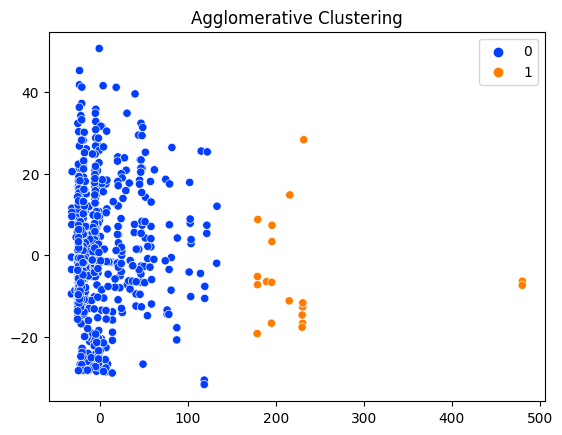

In [228]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(encoded_data)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit(encoded_data)
reduced_data = pca.transform(encoded_data)

# Visualization of clusters
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=agg_clustering.labels_,
                palette=sns.color_palette("bright", n_colors=2))
plt.title('Agglomerative Clustering')
plt.show()

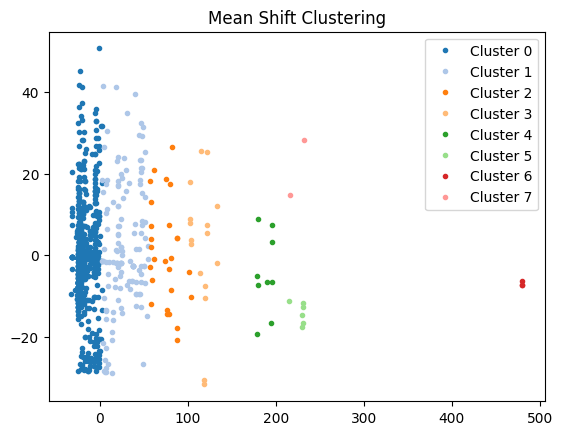

In [229]:
# Estimation of bandwidth parameter
bandwidth = estimate_bandwidth(encoded_data, quantile=0.2, n_samples=500)

# Mean Shift clustering
ms_clustering = MeanShift(bandwidth=bandwidth)
ms_clustering.fit(encoded_data)

# Determination of the number of clusters
labels = np.unique(ms_clustering.labels_)
n_clusters_ = len(labels)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit(encoded_data)
reduced_data = pca.transform(encoded_data)

# Visualization of clusters
plt.figure(1)
plt.clf()

# Define a colormap with 12 colors (one for each cluster)
cmap = cm.get_cmap('tab20')

# Loop through the clusters and plot the data points
for k in range(n_clusters_):
    # Select the data points belonging to the current cluster
    my_members = (ms_clustering.labels_ == k)
    
    # Get the color for the current cluster from the colormap
    color = cmap(k % cmap.N)
    
    # Plot the data points with the current color and marker style
    plt.plot(
        reduced_data[my_members, 0], reduced_data[my_members, 1],
        marker='.', linestyle='', color=color, label=f'Cluster {k}'
    )

# Add a legend and a title to the plot
plt.legend()
plt.title('Mean Shift Clustering')

# Show the plot
plt.show()
